# House Prices Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

!pip install mlxtend --upgrade
from mlxtend.evaluate import bias_variance_decomp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 31.5 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


## A) Dataset Information

In [ ]:
df = pd.read_csv('house price.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(414, 8)

## Comments
*The dataset consisits of 8 columns and 414 rows.

*The are no NaN objects.

*The are no duplcated items.

*Numerical Columns:

X1 transaction date - X2 house age - X3 distance to the nearest MRT station - X4 number of convenience stores - X5 latitude - X6 longitude - Y house price of unit area 

*No Non-Numerical columns

## ----------------------------------------------------------------------------------------------------------------------------------------------------------------

## B) Data Visualization

[Text(0.5, 1.0, 'Outliers: Number of Convenience Stores')]

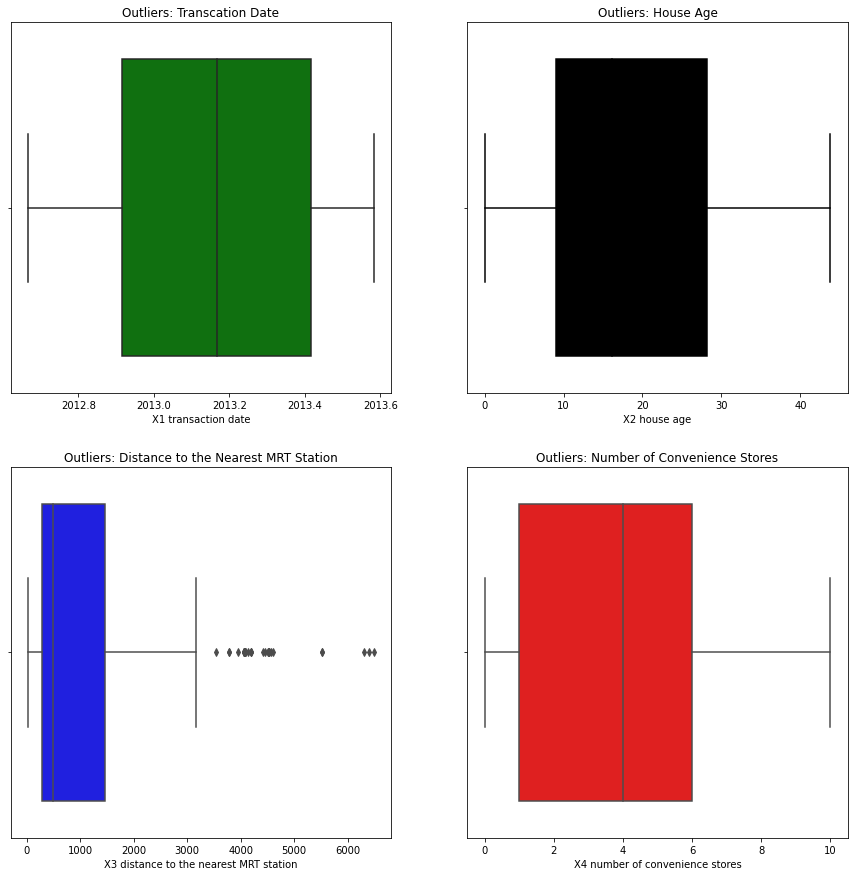

In [ ]:
# detecting the outliers
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(15,15)

sns.boxplot(x='X1 transaction date', data=df, color='green',ax=axes[0,0]).set(title='Outliers: Transcation Date')
sns.boxplot(x='X2 house age', data=df, color='black',ax=axes[0,1]).set(title='Outliers: House Age')
sns.boxplot(x='X3 distance to the nearest MRT station', data=df, color='blue',ax=axes[1,0]).set(title='Outliers: Distance to the Nearest MRT Station')
sns.boxplot(x='X4 number of convenience stores', data=df, color='red',ax=axes[1,1]).set(title='Outliers: Number of Convenience Stores')

#No Outliers in Number of Convenience Stores , House Age and Transaction Date

[Text(0.5, 1.0, 'Outliers: Longitude')]

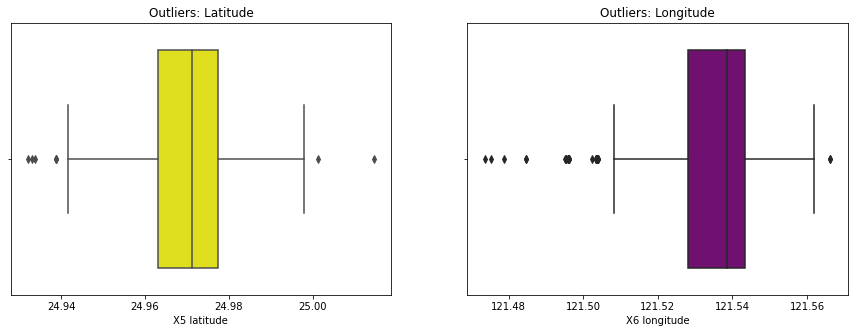

In [ ]:
# detecting the outliers
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15,5)

sns.boxplot(x='X5 latitude', data=df, color='yellow',ax=axes[0]).set(title='Outliers: Latitude')
sns.boxplot(x='X6 longitude', data=df, color='purple',ax=axes[1]).set(title='Outliers: Longitude')

#Some Outliers detected in both features

In [ ]:
#Large Distance to Nearest MRT Station
df[df['X3 distance to the nearest MRT station']>6000]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
116,117,2013.000,30.9,6396.283,1,24.94375,121.47883,12.2
249,250,2012.833,18.0,6306.153,1,24.95743,121.47516,15.0
347,348,2013.583,17.4,6488.021,1,24.95719,121.47353,11.2


In [ ]:
#High Latitude Houses
df[df['X5 latitude']>25]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
35,36,2013.500,13.9,4079.418,0,25.01459,121.51816,27.3
228,229,2013.417,11.9,3171.329,0,25.00115,121.51776,46.6


In [ ]:
#Lowest Longitude Houses
df[df['X6 longitude']<121.48]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
116,117,2013.000,30.9,6396.283,1,24.94375,121.47883,12.2
249,250,2012.833,18.0,6306.153,1,24.95743,121.47516,15.0
347,348,2013.583,17.4,6488.021,1,24.95719,121.47353,11.2


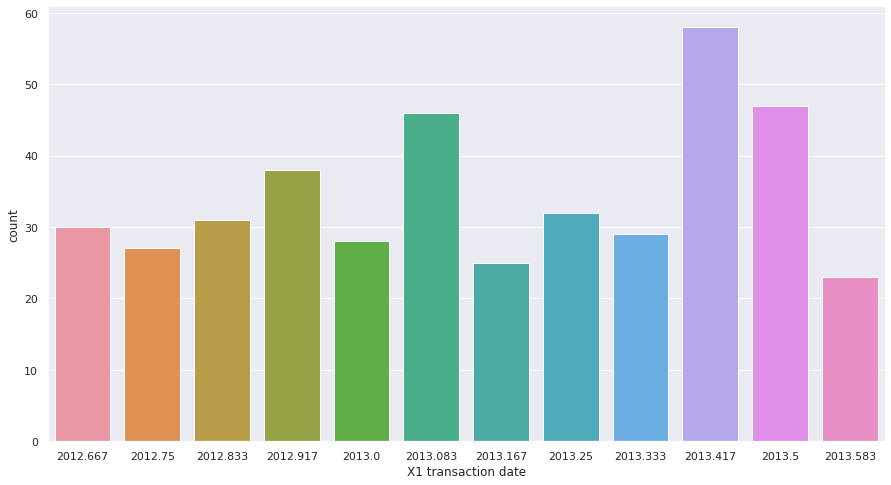

In [ ]:
#Differentiating between transaction dates
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x='X1 transaction date',data=df)

#Increase of transactions at the middle of 2013

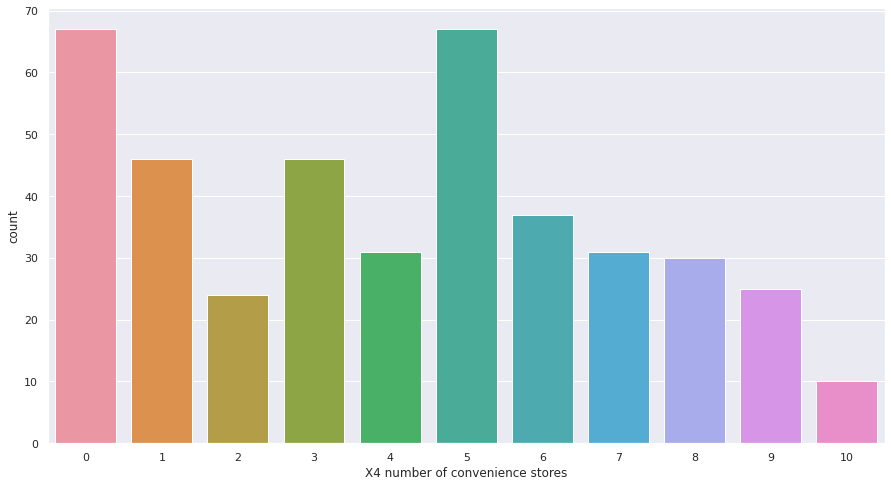

In [ ]:
# Differentiating between number of convenience stores
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(data=df,x='X4 number of convenience stores')

#We can monitor change of transactions according to number of convenience stores

In [ ]:
# Correlation between dataset columns
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


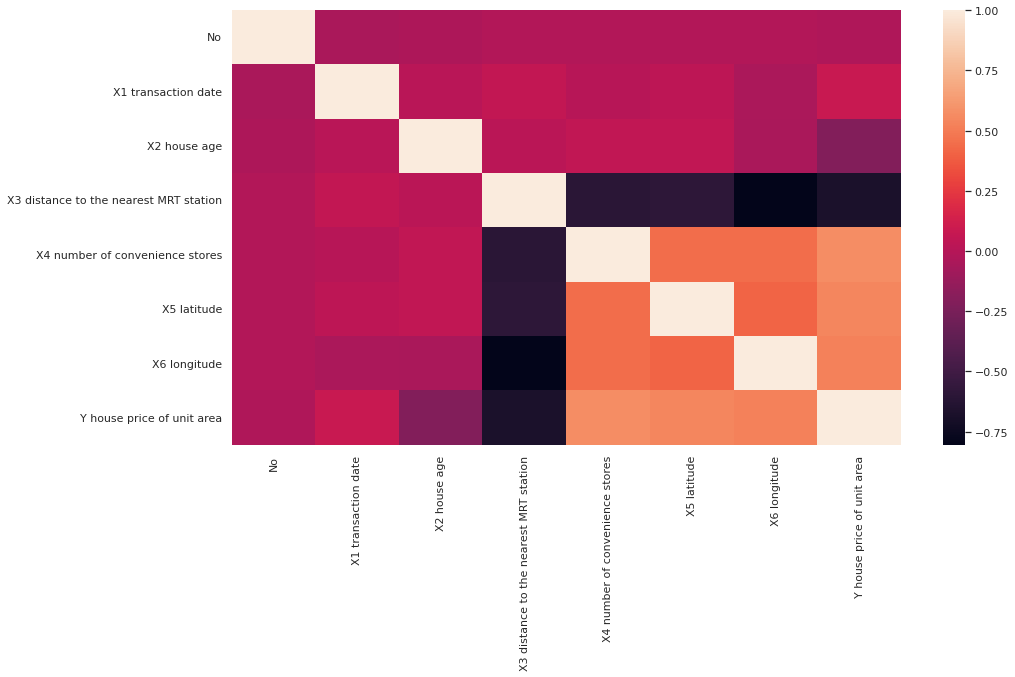

In [ ]:
#Visualizing the correlation between the features:
sns.heatmap(df.corr())

#We can drop first column "No" as it resembles index

In [ ]:
df.drop("No", axis=1, inplace=True)
df.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


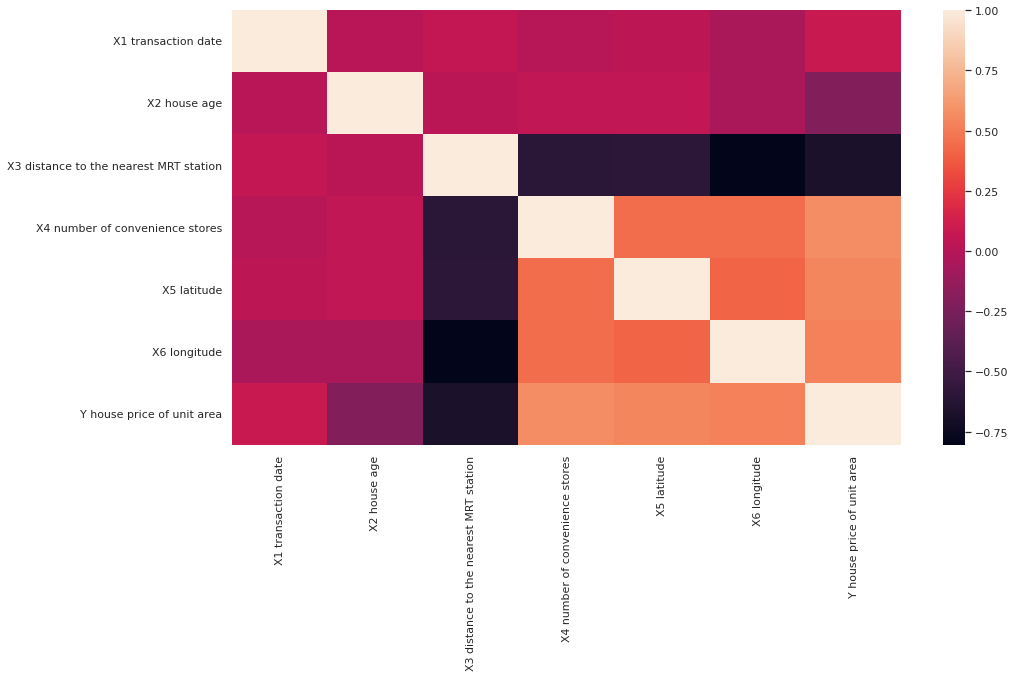

In [ ]:
#Visualizing the correlation between the features:
sns.heatmap(df.corr())

#Features from 3 to 6 has the highest correlation

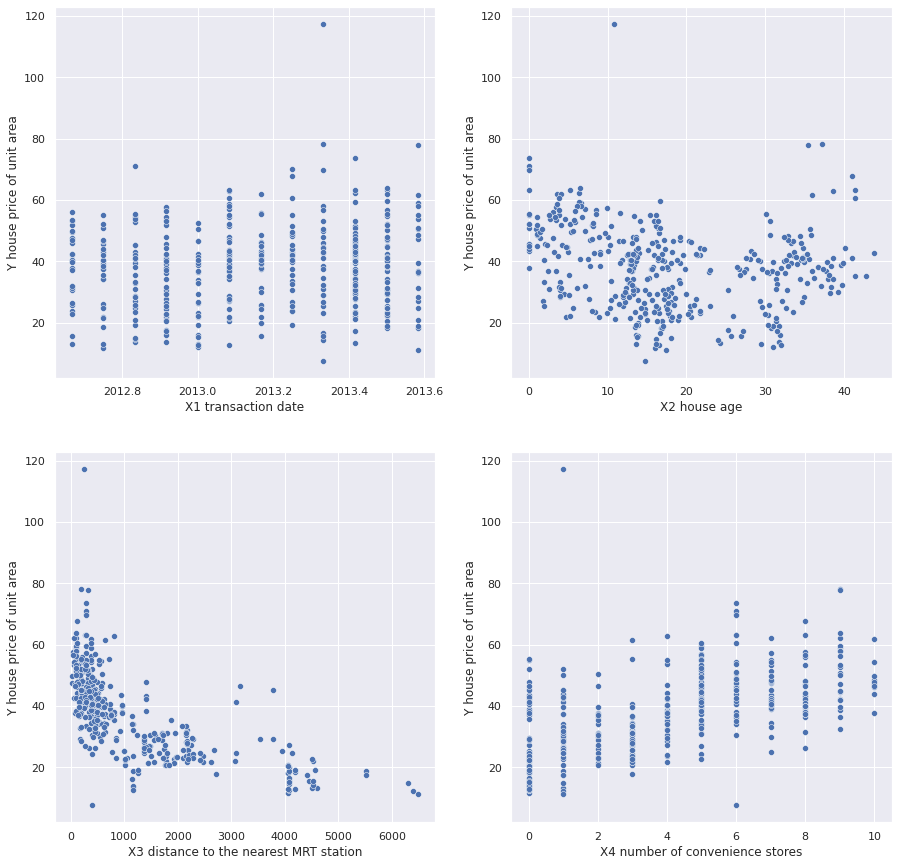

In [ ]:
# Scatter Plot
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(15,15)

sns.scatterplot(x='X1 transaction date',y='Y house price of unit area',data=df,ax=axes[0,0])
sns.scatterplot(x='X2 house age',y='Y house price of unit area',data=df,ax=axes[0,1])
sns.scatterplot(x='X3 distance to the nearest MRT station',y='Y house price of unit area',data=df,ax=axes[1,0])
sns.scatterplot(x='X4 number of convenience stores',y='Y house price of unit area',data=df,ax=axes[1,1])

# Not all features can be fitted with linear regression

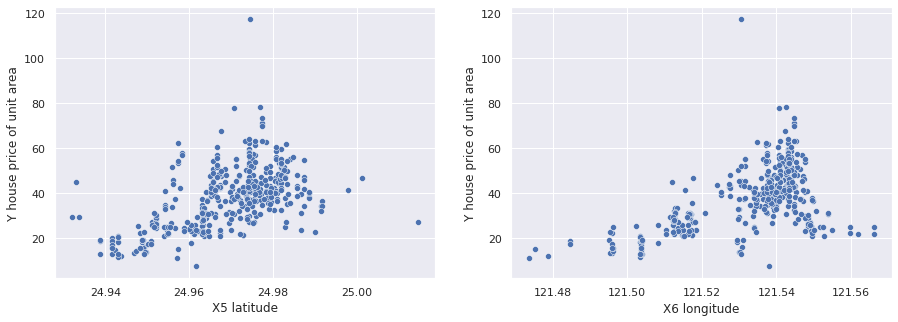

In [ ]:
# Scatter Plot
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15,5)

sns.scatterplot(x='X5 latitude',y='Y house price of unit area',data=df,ax=axes[0])

sns.scatterplot(x='X6 longitude',y='Y house price of unit area',data=df,ax=axes[1])

# Can be fitted with linear regression

## Comments
*First Column "No" will be igonred 

*Features X1 and X2 have weak correlation with output.

So we will try at first to train model with feature from X3 to X6

*Not all featurs can be fitted with linear regression. 

So we will try to increase model complexity by increasing degree (Polynomial regression)

## ----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Machine Learning 

In [ ]:
# split into training and testing sets (Including Features from X3 to X6)
x=df[['X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']].values
y=df['Y house price of unit area'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [ ]:
# Multi variable linear regression
model_multi = linear_model.LinearRegression()

model_multi.fit(x_train,y_train)

model_multi.predict([[2000,4,24.96,121.50]])

array([32.69617084])

In [ ]:
print("A0 = ",model_multi.intercept_)
print("A1 = ",model_multi.coef_)

A0 =  -1774.7617347768391
A1 =  [-4.81169886e-03  1.08534608e+00  1.97863376e+02 -2.57278184e+01]


In [ ]:
# Get Bias and Variance - bias_variance_decomp function
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(model_multi, x_train, y_train, x_test, y_test, loss='mse', num_rounds=4, random_seed=43)
# Display Bias and Variance
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

Average Expected Loss: 71.406
Average Bias: 69.9926
Average Variance: 1.4134


In [ ]:
# Evaluating Model by calculating Errors
y_pred = model_multi.predict(x_test)

MSE = mean_squared_error(y_test,y_pred)
print('mean_squared_error',MSE)

RMSE = np.sqrt(MSE)
print('Root_mean_squared_error',RMSE)

r_score = r2_score(y_test,y_pred)
print('r_score',r_score)

MAE= mean_absolute_error(y_test,y_pred)

print('mean_absolute_error',MAE)

mean_squared_error 71.4985593822627
Root_mean_squared_error 8.455682076702193
r_score 0.5950669529918162
mean_absolute_error 6.585181945259655


In [ ]:
# Increasing degree to obtain better results (degree 3)
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_poly, y, random_state=1)

new_model = linear_model.LinearRegression()
new_model.fit(x_train2,y_train2)

print("A0 = ",new_model.intercept_)

# Get Bias and Variance - bias_variance_decomp function
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(new_model, x_train2, y_train2, x_test2, y_test2, loss='mse', num_rounds=4, random_seed=43)
# Display Bias and Variance
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

# Evaluating Model by calculating Errors
y_pred = new_model.predict(x_test2)
MSE = mean_squared_error(y_test2,y_pred)
print('mean_squared_error',MSE)
RMSE = np.sqrt(MSE)
print('Root_mean_squared_error',RMSE)
r_score = r2_score(y_test2,y_pred)
print('r_score',r_score)
MAE= mean_absolute_error(y_test2,y_pred)
print('mean_absolute_error',MAE)

A0 =  100867573.33109745
Average Expected Loss: 225.0055
Average Bias: 98.3083
Average Variance: 126.6971
mean_squared_error 54.58251974517834
Root_mean_squared_error 7.387998358498622
r_score 0.690871169646496
mean_absolute_error 5.822350836910595


In [ ]:
# Changing degree to obtain better results (degree 2)
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_poly, y, random_state=1)

new_model = linear_model.LinearRegression()
new_model.fit(x_train2,y_train2)

print("A0 = ",new_model.intercept_)

# Get Bias and Variance - bias_variance_decomp function
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(new_model, x_train2, y_train2, x_test2, y_test2, loss='mse', num_rounds=4, random_seed=43)
# Display Bias and Variance
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

# Evaluating Model by calculating Errors
y_pred = new_model.predict(x_test2)
MSE = mean_squared_error(y_test2,y_pred)
print('mean_squared_error',MSE)
RMSE = np.sqrt(MSE)
print('Root_mean_squared_error',RMSE)
r_score = r2_score(y_test2,y_pred)
print('r_score',r_score)
MAE= mean_absolute_error(y_test2,y_pred)
print('mean_absolute_error',MAE)

#Second degree gives the best results for model bias and variance

A0 =  313355404.48416215
Average Expected Loss: 65.2023
Average Bias: 61.0865
Average Variance: 4.1158
mean_squared_error 58.54511078564056
Root_mean_squared_error 7.651477686410682
r_score 0.6684289823083863
mean_absolute_error 6.058733557050045


In [ ]:
# Trying to include rest of features to obtain better results
x3=df[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']].values
y3=df['Y house price of unit area'].values

poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x3)

x_train3, x_test3, y_train3, y_test3 = train_test_split(x_poly, y3, random_state=1)

new_model = linear_model.LinearRegression()
new_model.fit(x_train3,y_train3)

print("A0 = ",new_model.intercept_)

# Get Bias and Variance - bias_variance_decomp function
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(new_model, x_train3, y_train3, x_test3, y_test3, loss='mse', num_rounds=4, random_seed=43)
# Display Bias and Variance
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

y_pred = new_model.predict(x_test3)
MSE = mean_squared_error(y_test3,y_pred)
print('mean_squared_error',MSE)
RMSE = np.sqrt(MSE)
print('Root_mean_squared_error',RMSE)
r_score = r2_score(y_test3,y_pred)
print('r_score',r_score)
MAE= mean_absolute_error(y_test3,y_pred)
print('mean_absolute_error',MAE)

# The best result obtained at second degree and all features included 
# Average Bias: 39.4999 , Average Variance: 5.1353

A0 =  62177029.988614775
Average Expected Loss: 44.6352
Average Bias: 39.4999
Average Variance: 5.1353
mean_squared_error 39.31094425629494
Root_mean_squared_error 6.269844037637215
r_score 0.777361941611101
mean_absolute_error 4.9361182248076565


## Conclusion
*The best results were obtained after including all features.

*As observed from EDA not all features were fitted through linear regression so second degree polynomial regression was used.

*Best Obtained Model Score:

Average Expected Loss: 44.6352

Average Bias: 39.4999

Average Variance: 5.1353

mean_squared_error 39.31094425629494

Root_mean_squared_error 6.269844037637215

r_score 0.777361941611101

mean_absolute_error 4.9361182248076565


## ----------------------------------------------------------------------------------------------------------------------------------------------------------------